In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Handle duplicated values

In [6]:
iris_df.duplicated().sum()

np.int64(1)

In [7]:
iris_df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Prepare data for training

In [8]:
numrical_cols = iris_df.select_dtypes(include=np.number).columns.tolist()

In [9]:
X = iris_df[numrical_cols]

## K-Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

In [10]:
from sklearn.cluster import KMeans

### Building Model

In [11]:
kmeans_model = KMeans(random_state=42, n_clusters=3)

In [12]:
kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [13]:
kmeans_model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

Prediction

In [14]:
preds = kmeans_model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

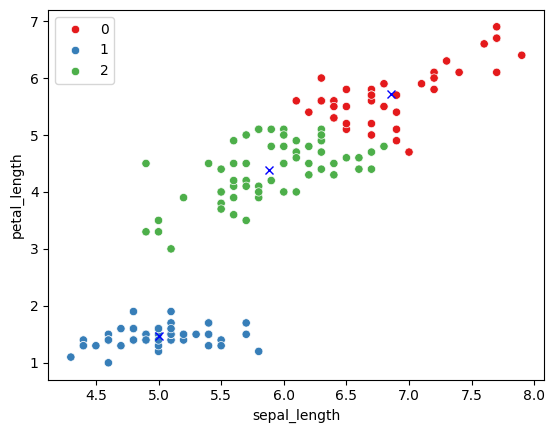

In [15]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds, palette='Set1');
centers_x, centers_y = kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

### Model Evaluation

#### Inertia

In [16]:
print(f'Inertia: {kmeans_model.inertia_}')

Inertia: 78.85566582597731


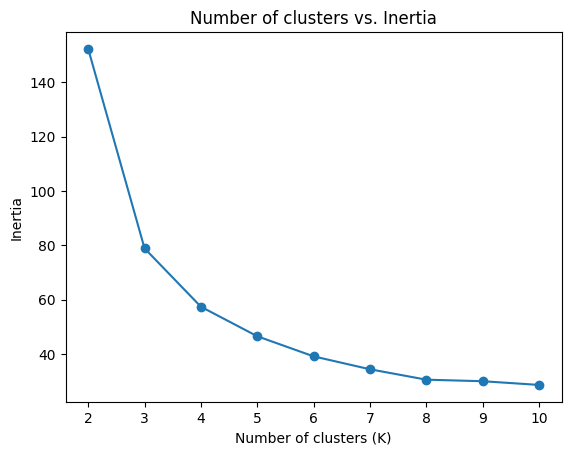

In [17]:
options = range(2,11)
inertias = []

for n_clusters in options:
    kmeans_model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(kmeans_model.inertia_)
    
plt.title("Number of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia');

#### Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score = silhouette_score(X, preds)

In [20]:
print(f'Silhouette Score: {silhouette_score}')

Silhouette Score: 0.5511916046195927


In [21]:
import joblib

In [30]:
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

## DBSCAN
1. Set values for Epsilon (radius) and Min_samples (minimum neighbors).
2. For each point, if it has at least Min_samples neighbors within Epsilon, it is a core point.
3. Form clusters:
    - Connect all core points within Epsilon distance to form clusters.
    - Add reachable points (non-core points within Epsilon of any core point) to these clusters.
4. Points that are neither core points nor reachable points are marked as noise.

In [23]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan_model = DBSCAN(eps=1.1, min_samples=4)

In [45]:
dbscan_model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [46]:
dbscan_model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [47]:
dbscan_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

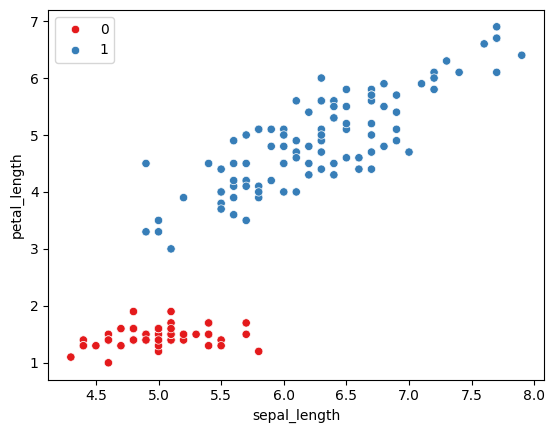

In [48]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=dbscan_model.labels_, palette='Set1')
plt.show()

In [49]:
joblib.dump(dbscan_model, 'dbscan_model.pkl')

['dbscan_model.pkl']